In [17]:
import cv2
import numpy as np
from PIL import Image

from ultralytics import YOLOE
import torch

In [18]:
def image_to_segmentations(model, img_path, conf_threshold = 0.25, iou_threshold = 0.1):

    image_bgr = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    height, width = image_rgb.shape[:2]

    results = model.predict(img_path, conf=conf_threshold, iou=iou_threshold)
    masks = results[0].masks.data.cpu().numpy()  # Shape: (N, h, w)

    segmentations = []

    for binary_mask in masks:
        if binary_mask.shape != (height, width):
            binary_mask = cv2.resize(binary_mask, (width, height), interpolation=cv2.INTER_NEAREST)

        binary_mask = (binary_mask > 0).astype(np.uint8)

        masked = image_rgb * binary_mask[:, :, None]

        segmentations.append(Image.fromarray(masked))

    return segmentations

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
segmenter = YOLOE("yoloe-11l-seg-pf.pt")

In [22]:
src_img = "assets/demo_human.jpg"
segmentations = image_to_segmentations(segmenter, src_img)

Ultralytics 8.3.158 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3080, 9882MiB)
YOLOe-11l-seg summary (fused): 229 layers, 36,680,414 parameters, 2,638,581 gradients, 161.6 GFLOPs

image 1/1 /home/andre/repos/pixo/test.jpg: 640x640 1 backdrop, 1 bean bag chair, 1 bib, 1 hairstyle, 1 kilt, 1 lace dress, 1 neck, 1 neckband, 1 neckline, 1 shirt, 1 teenager, 1 woman, 17.3ms
Speed: 1.1ms preprocess, 17.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


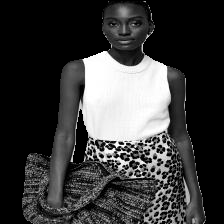

In [23]:
img = segmentations[0]
img

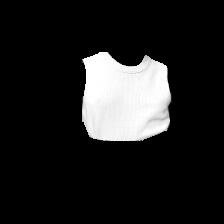

In [13]:
img = segmentations[1]
img

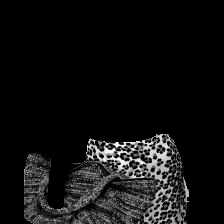

In [16]:
img = segmentations[4]
img